In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
df.columns = ['C_ID','Gender','Age','AnnualIncome','SpendingScore']
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
df.shape

(200, 5)

#### Problem Statement - Based on Annual Income and Spending Score, create different clusters

In [86]:
x = df.iloc[:,3:].values
print(type(x))
print(x[:5])

<class 'numpy.ndarray'>
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


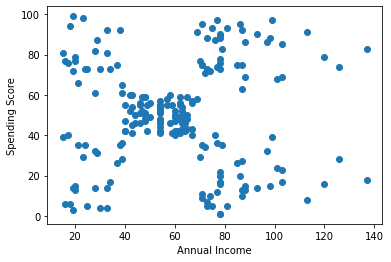

In [87]:
plt.scatter(x[:,0],x[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### Elbow Method

In [88]:
from sklearn.cluster import KMeans

WCSS
 [269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30241.34361793659, 25043.890043290045, 21932.39204424098, 20093.594187014536, 17556.600879214166, 15963.395846217274, 14398.35214171793, 12746.969092182328, 11693.002037093342, 10789.675681545763, 10289.905790523819, 9464.868725175791]


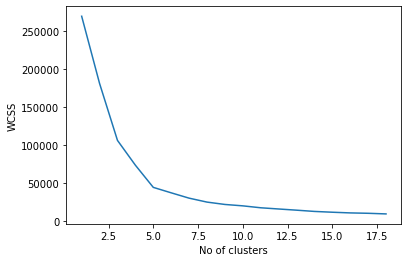

In [89]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,19): # no of clusters
    m = KMeans(n_clusters=i)
    m.fit(x)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

-<b> Optimal number of cluster=5 (elbow bend)

## Applying KMeans at K=5

In [90]:
k5= KMeans(n_clusters=5)
k5.fit(x)
ypred5=k5.predict(x)
print(ypred5)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 0 4 2 4 0 4 0 4 2 4 0 4 0 4 0 4 0 4 2 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [91]:
labels5= k5.labels_
print(labels5)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 0 4 2 4 0 4 0 4 2 4 0 4 0 4 0 4 0 4 2 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [92]:
cent5= k5.cluster_centers_
print(cent5)

[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]]


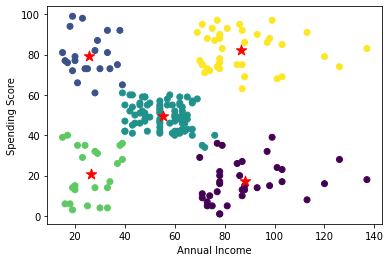

In [93]:
plt.scatter(x[:,0],x[:,1],c=ypred5)
plt.scatter(cent5[:,0],cent5[:,1],color='red',marker='*',s=120)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [94]:
print('No. of iterations:',k5.n_iter_)

No. of iterations: 7


In [95]:
df['Cls5']=ypred5
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore,Cls5
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [96]:
df['Cls5'].value_counts()

2    81
4    39
0    35
3    23
1    22
Name: Cls5, dtype: int64

### Clustering Result

In [97]:
res=df.iloc[:,3:].groupby(['Cls5']).mean().T
res

Cls5,0,1,2,3,4
AnnualIncome,88.200000,25.727273,55.296296,26.304348,86.538462
SpendingScore,17.114286,79.363636,49.518519,20.913043,82.128205


#### Inference:
- Cls0-  High Annual Income & Low Spending Score
- Cls1-  Medium Annual Income & Medium Spending Score
- Cls2-  Low Annual Income & High Spending Score
- Cls3-  High Annual Income & High Spending Score
- Cls4-  Low Annual Income & Low Spending Score

## Applying KMeans at K=3

In [98]:
k3= KMeans(n_clusters=3)
k3.fit(x)
ypred3=k3.predict(x)
print(ypred3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [99]:
labels3= k3.labels_
print(labels3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [100]:
cent3= k3.cluster_centers_
print(cent3)

[[87.         18.63157895]
 [44.15447154 49.82926829]
 [86.53846154 82.12820513]]


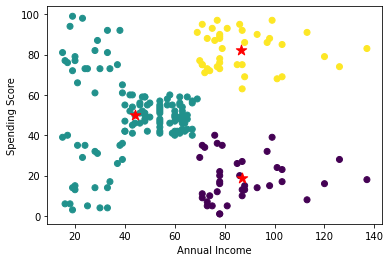

In [101]:
plt.scatter(x[:,0],x[:,1],c=ypred3)
plt.scatter(cent3[:,0],cent3[:,1],color='red',marker='*',s=120)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [102]:
print('No. of iterations:',k3.n_iter_)

No. of iterations: 3


In [103]:
df['Cls3']=ypred3
df.head()

,C_ID,Gender,Age,AnnualIncome,SpendingScore,Cls5,Cls3
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,3,1


In [104]:
df['Cls3'].value_counts()

1    123
2     39
0     38
Name: Cls3, dtype: int64

### Clustering Result

In [105]:
r1=df.iloc[:,[3,4,6]]
r1

,AnnualIncome,SpendingScore,Cls3
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [106]:
res1=r1.groupby(['Cls3']).mean().T
res1

Cls3,0,1,2
AnnualIncome,87.000000,44.154472,86.538462
SpendingScore,18.631579,49.829268,82.128205


#### Inference:
- Cls0-  Medium Annual Income & Medium Spending Score
- Cls1-  High Annual Income & Low Spending Score
- Cls2-  High Annual Income & High Spending Score

### Silhouette Score

In [107]:
from sklearn.metrics import silhouette_score

In [108]:
for i in range(2,10):
    m=KMeans(n_clusters=i).fit(x)
    print(f'Silhouette Score at K={i}',silhouette_score(x,m.labels_))

Silhouette Score at K=2 0.2968969162503008
Silhouette Score at K=3 0.46761358158775435
Silhouette Score at K=4 0.4931963109249047
Silhouette Score at K=5 0.553931997444648
Silhouette Score at K=6 0.5393922132561455
Silhouette Score at K=7 0.5270287298101395
Silhouette Score at K=8 0.45827056882053113
Silhouette Score at K=9 0.4569479922714121


- <b> Optimal value at K=5 as silhouette score highest and closest to 1 